# Data Science Final Project
Emily Chang (echang39) and Marion Pang (mpangwa1)

## Part b and c

Note: We started by Stratified K-Fold instead of normal K-Fold splits for cross validation, thinking that it was better to balance the classes before performing logistic regression. It wasn't till we read part e that we realized that we were supposed to use balancing there instead. Thus, parts b-d were performed with **balanced** classes, and part e was instead done with **imbalanced** classes.

We also ran the code on a local jupyter notebook instead of on colab to speed up the runtime, so the output may appear as executed by "Unknown".

Sorry about the confusion!

In [218]:
# import libraries
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels as sm
import sklearn as skl
import sklearn.metrics as skm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# access files stored on Google Drive from Colab
from google.colab import drive
drive.mount('gdrive/')

import warnings
warnings.filterwarnings("ignore")

In [219]:
# read in datasets
#glmTest = pd.read_csv("glm.test.data.csv")
#glmTrain = pd.read_csv("glm.training.data.csv")
#testOnsetini = pd.read_csv("test.onsets.csv")
#testTSini = pd.read_csv("timestamps.test.csv")
glmTest = pd.read_csv("gdrive/My Drive/bmdslab/final-project/glm.test.data.csv")
glmTrain = pd.read_csv("gdrive/My Drive/bmdslab/final-project/glm.training.data.csv")
testOnsetini = pd.read_csv("gdrive/My Drive/bmdslab/final-project/test.onsets.csv")
testTSini = pd.read_csv("gdrive/My Drive/bmdslab/final-project/timestamps.test.csv")

# create duplicates of datasets
testTS=testTSini
testOnset=testOnsetini
glmTrain2=glmTrain

# filtering out bpm <=20 or > 500, since lowest and highest ventricular heart rate ever recorded is 28 and 480 respectively
glmTrain2=glmTrain2.drop(glmTrain2[(glmTrain2['x.hr']<=20) | (glmTrain2['x.hr']>500)].index) 
# filter out duplicate data from same sample
#keys=glmTrain2.keys().drop('Unnamed: 0','y').tolist()
#glmTrain2=glmTrain2.groupby(keys).mean().reset_index(level=list(range(0,len(keys))))
# filter fahrenheit: highest recorded 114F (45C) lowest 57F
glmTrain2['x.temp']=np.where(glmTrain2['x.temp']>50, (glmTrain2['x.temp']-32)*5/9, glmTrain2['x.temp'])

# normalize data
scaler = skl.preprocessing.StandardScaler()
x_train = glmTrain2.drop(["Unnamed: 0","y"],axis=1)
x_trainDM = scaler.fit_transform(glmTrain2.drop(["Unnamed: 0","y"],axis=1))
y_train=glmTrain2["y"].values

# make empty AUC array to store lambda and AUC values
allAUC=[]
g_allAUC=[]

In [220]:
# create duplicates of datasets
glmTest2=glmTest

# filtering out bpm <=20 or > 500, since lowest and highest ventricular heart rate ever recorded is 28 and 480 respectively
glmTest2=glmTest2.drop(glmTest2[(glmTest2['hr']<=20) | (glmTest2['hr']>500)].index) 
# filter out duplicate data from same sample
#keys=glmTrain2.keys().drop('Unnamed: 0','y').tolist()
#glmTrain2=glmTrain2.groupby(keys).mean().reset_index(level=list(range(0,len(keys))))
# filter fahrenheit: highest recorded 114F (45C) lowest 57F
glmTest2['temp']=np.where(glmTest2['temp']>50, (glmTest2['temp']-32)*5/9, glmTest2['temp'])

# normalize data
scaler = skl.preprocessing.StandardScaler()
x_test = glmTest2.drop(["Unnamed: 0","y"],axis=1)
x_testDM = scaler.fit_transform(glmTest2.drop(["Unnamed: 0","y","patient"],axis=1))
y_test=glmTest2["y"].values

Now testing lambda =  1e-05
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


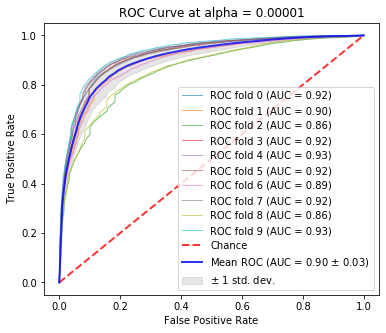

Now testing lambda =  0.0001
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


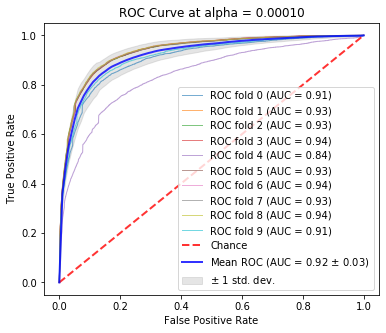

Now testing lambda =  0.001
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


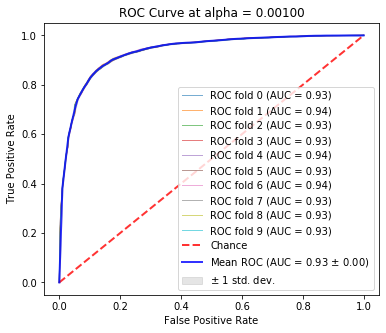

Now testing lambda =  0.01
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


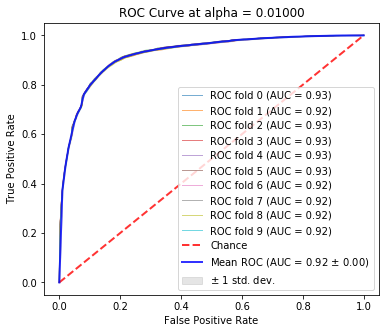

Now testing lambda =  0.1
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


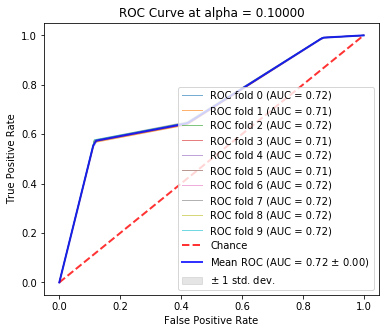

Now testing lambda =  1.0
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


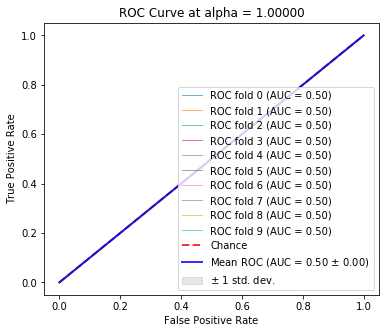

Now testing lambda =  10.0
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


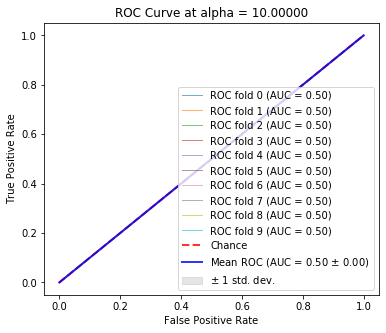

In [248]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# models.crossvalidation.kfold
# LogisticRegressionCV

# c = regularization strength, c = 1/lambda
allAUC=[]

skf = KFold(n_splits=10,shuffle=True) # throws error when only all 0 or all 1 in training y set, so use stratified instead
stratKfold = StratifiedKFold(n_splits=10) # The folds are made by preserving the percentage of samples for each class.

# spliting up data biases model i.e. not random profiles, cross-validation compares outcomes over diff data to account for bias over the multiple sets 
for lamb in np.logspace(-5, 1, 7):
    print("Now testing lambda = ", lamb)
    logreg = SGDClassifier(alpha=lamb,penalty='l1', tol=0.01, max_iter=200, loss='log')

    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)
  
    i=0

    plt.figure(figsize=(6,5))
    for train, test in skf.split(x_trainDM,y_train):
        print("Now at fold ", i)
        mod = logreg.fit(x_trainDM[train], y_train[train])
        probas_ = mod.predict_proba(x_trainDM[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = skm.roc_curve(y_train[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = skm.roc_auc_score(y_train[test],probas_[:,1])
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        accs.append(skm.accuracy_score(y_train[test], mod.predict(x_trainDM[test])))
        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = skm.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve at alpha = %0.5f' % lamb)
    plt.legend(loc="lower right")
    plt.show()
    
    allAUC.append([lamb, mean_auc,np.mean(accs)])

Now testing lambda =  0.00031622776601683794
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


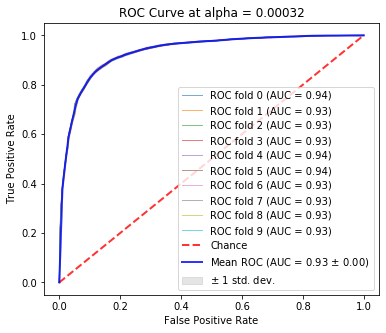

Now testing lambda =  0.0005274997063702619
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


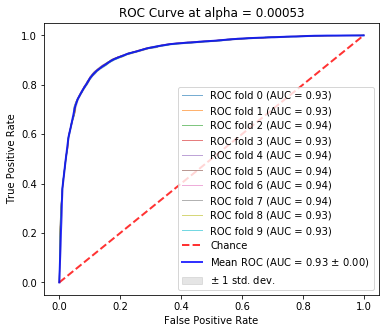

Now testing lambda =  0.0008799225435691075
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


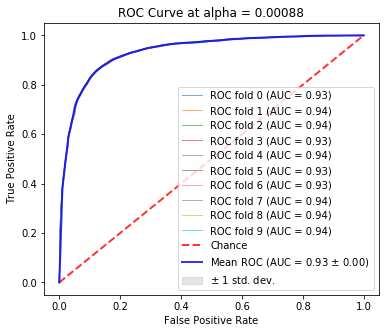

Now testing lambda =  0.0014677992676220691
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


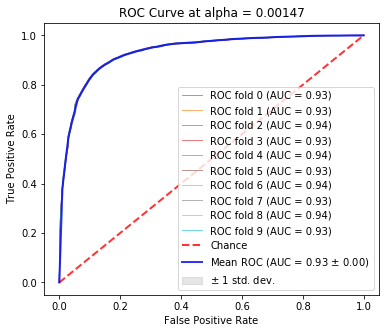

Now testing lambda =  0.002448436746822227
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


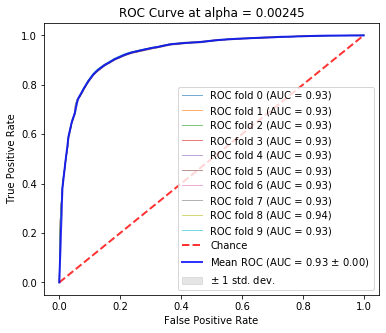

Now testing lambda =  0.004084238652674522
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


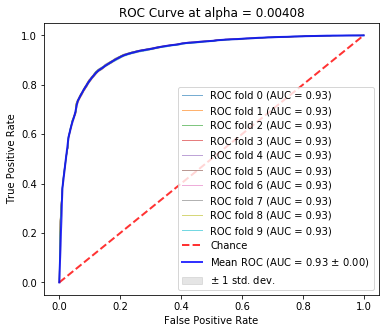

Now testing lambda =  0.006812920690579608
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


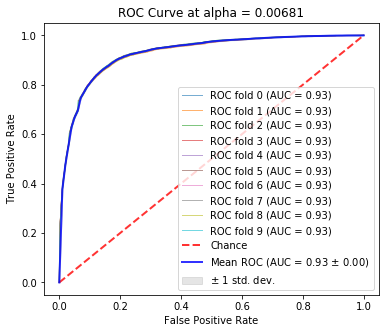

Now testing lambda =  0.011364636663857243
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


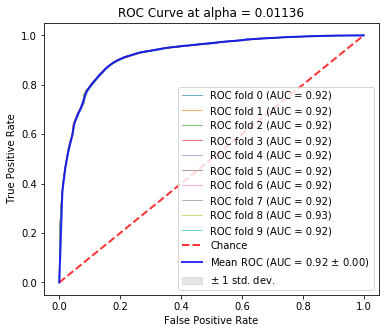

Now testing lambda =  0.018957356524063752
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


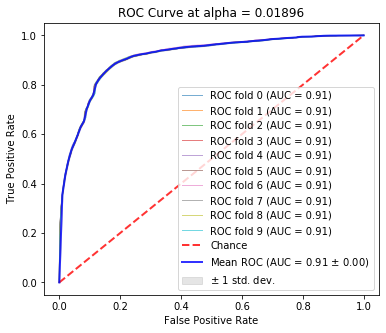

Now testing lambda =  0.03162277660168379
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


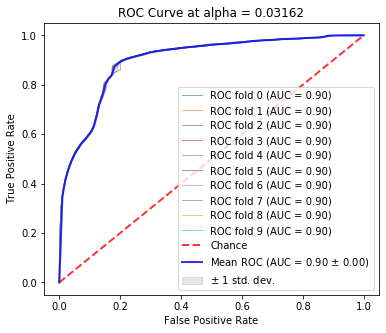

In [249]:
# run another round of optimization, between the values of 10^-4 and 10^-1
# spliting up data biases model i.e. not random profiles, cross-validation compares outcomes over diff data to account for bias over the multiple sets 
for lamb in np.logspace(-3.5, -1.5, 10):  
    print("Now testing lambda = ", lamb)
    logreg = SGDClassifier(alpha=lamb,penalty='l1', tol=0.01, max_iter=200, loss='log')
    tprs = []
    aucs = []
    accs = []
    mean_fpr = np.linspace(0, 1, 100)
  
    i=0
    plt.figure(figsize=(6,5))
    
    for train, test in skf.split(x_trainDM,y_train):
        print("Now at fold ", i)
        mod = logreg.fit(x_trainDM[train], y_train[train])
        probas_ = mod.predict_proba(x_trainDM[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = skm.roc_curve(y_train[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = skm.roc_auc_score(y_train[test],probas_[:,1])
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        accs.append(skm.accuracy_score(y_train[test], mod.predict(x_trainDM[test])))
        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = skm.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve at alpha = %0.5f' % lamb)
    plt.legend(loc="lower right")
    plt.show()
    
    allAUC.append([lamb, mean_auc,np.mean(accs)])

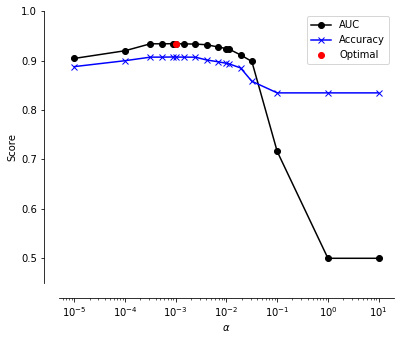

In [251]:
# plot lambda, scores, and selected optimal value
AUC=np.array(allAUC)

AUC=AUC[AUC[:,0].argsort()]

plt.figure(figsize=(6,5))
plt.plot(AUC[:,0], AUC[:,1], '-ko')
plt.plot(AUC[:,0], AUC[:,2], '-bx')
plt.plot(AUC[5,0],AUC[5,1],color='r',marker="o",linestyle='none')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
plt.legend(('AUC','Accuracy','Optimal'))
plt.ylim([0.45,1])
sns.despine(offset=15)

In [252]:
# lambda alpha (1.00000000e+04) is optimal alpha, so 
optiLamb=AUC[5,0]
print("Optimal lambda is: ", AUC[5,0]*0.9*glmTrain2.shape[0])

logreg = SGDClassifier(alpha=optiLamb,penalty='l1', tol=0.01, max_iter=200, loss='log')
mod = logreg.fit(x_trainDM, y_train)

Optimal lambda is:  1418.4639000000002


Thus, the optimal lambda value obtained is: **1418.46**

## Part d

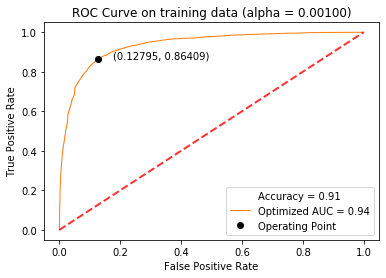

Accuracy:  0.9076824584679244
AUC:  0.9351781727580851


,keys,coef
19,x.hct,0.041790
27,x.kidney.sofa,0.053600
8,x.fio2,0.126068
7,x.pao2,0.134642
17,x.paco2,-0.170129
25,x.liver.sofa,0.182759
22,x.resp.sofa,0.248155
4,x.resp,0.286132
0,x.hr,0.344661
21,x.urine,-0.622550


In [262]:
probas_ = mod.predict_proba(x_trainDM)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = skm.roc_curve(y_train, probas_[:, 1])
roc_auc = skm.roc_auc_score(y_train,probas_[:,1])
acc = skm.accuracy_score(y_train, mod.predict(x_trainDM))

# find shortest distance to tpr=1,fpr=0 to determine optimal threshold
roc_values=np.transpose(np.vstack((fpr,tpr)))
dist=np.empty((roc_values.shape[0],1))
for i in range(0,roc_values.shape[0]):
    dist[i]=np.linalg.norm((0,1)-roc_values[i])
x_coord = roc_values[np.argmin(dist)][0]
y_coord = roc_values[np.argmin(dist)][1]
# plot ROC curve
plt.plot([], [], ' ', label="Accuracy = %0.2f" % acc)
plt.plot(fpr, tpr, lw=1, label='Optimized AUC = %0.2f' % (roc_auc))
plt.plot(x_coord,y_coord,color='k',marker='o',linestyle="None",label='Operating Point')
plt.text(x_coord+0.05, y_coord, '({}, {})'.format(round(x_coord,5), round(y_coord,5)))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on training data (alpha = %0.5f)' % optiLamb)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()

print("Accuracy: ", acc)
print("AUC: ", roc_auc)
helps2=pd.DataFrame()
helps2['keys']=x_train.keys()
helps2['coef']=mod.coef_[0]
helps3=helps2.drop(helps2[helps2["coef"]==0].index,axis=0)
helps3.sort_values("coef")

helps3.iloc[helps3['coef'].abs().argsort()]

## Part e

In [264]:
testProbas_ = mod.predict_proba(x_testDM)

# Compute ROC curve and area the curve
test_roc_auc = skm.roc_auc_score(y_test,testProbas_[:,1])

print("For testing set")
print("Accuracy: ", skm.accuracy_score(y_test, mod.predict(x_testDM)))
print("AUC: ", test_roc_auc)
print("PPV: ", np.sum(y_test)/np.sum(mod.predict(x_testDM)))
print("Sensitivity: ",y_coord)
print("Specificity: ",1-x_coord)

For testing set
Accuracy:  0.7306730814584218
AUC:  0.6685979228958469
PPV:  2.026224970656763
Sensitivity:  0.8640925040117319
Specificity:  0.8720523569362679


Median: 7.467h


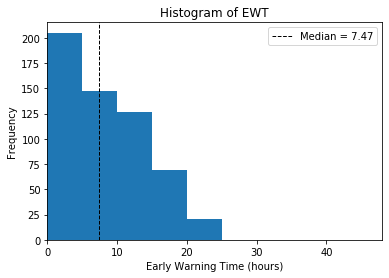

In [265]:
#moving on to part e
testOnset = testOnsetini

optimalIndex = np.where((fpr == x_coord) & (tpr == y_coord))
optimalThreshold = thresholds[optimalIndex][0]

# first, apply model to testing data
y_testPred=mod.predict(x_testDM)
y_testPred[y_testPred>optimalThreshold]=1

# filter data to find patients with both predicted AND actual y = 1
glmTest_filt=glmTest2[['patient','y']]
glmTest_filt['y_pred'] = np.array(y_testPred)
glmTest_filt['TS']=testTSini['x']
glmTest_SepticShock=glmTest_filt[(glmTest_filt['y_pred']==1)&(glmTest_filt['y']==1)].groupby('patient').first()
glmTest_SepticShock['patient'] = glmTest_SepticShock.index

# convert strings to datetime
from datetime import datetime
from dateutil.parser import parse

# concat measurement timestamp to glmTest_SepticShock
glmTest_SepticShock['TS']=[i.replace(year=2020,month=10,day=17) for i in [parse(x) for x in glmTest_SepticShock['TS'].values]]
#,month=10,day=17

# concat actual onset timestamp to glmTest_SepticShock
glmAllSeptic=glmTest2[glmTest2['y']==1].groupby('patient').first()
glmAllSeptic['patient'] = glmAllSeptic.index
glmAllSeptic = glmAllSeptic.reset_index(drop=True)
testOnset = testOnset.reset_index(drop=True)
testOnset = testOnset.join(glmAllSeptic['patient'])
glmTest_SepticShock['Onset']=[testOnset.iloc[list(np.where(testOnset['patient'] == x)[0])[0],1] for x in glmTest_SepticShock['patient'].values]
glmTest_SepticShock['Onset']=[i.replace(year=2020,month=10,day=17) for i in [parse(x) for x in glmTest_SepticShock['Onset'].values]]

# find difference between measurement TS and onset TS
glmTest_SepticShock.reset_index(drop=True)
glmTest_SepticShock['EWT']=[(glmTest_SepticShock.iloc[x,4]-glmTest_SepticShock.iloc[x,2]).total_seconds()/(60*60) for x in range(0,len(glmTest_SepticShock))]
#glmTest_SepticShock['EWT']=np.where(glmTest_SepticShock['EWT']<0, 0, glmTest_SepticShock['EWT'])
glmTest_SepticShock = glmTest_SepticShock.drop(glmTest_SepticShock[glmTest_SepticShock['EWT'] < 0].index)
plt.hist(glmTest_SepticShock['EWT'].values,bins=range(0,50,5))
plt.xlim([0,48])
plt.title("Histogram of EWT")
plt.xlabel("Early Warning Time (hours)")
plt.ylabel("Frequency")
plt.axvline(np.median(glmTest_SepticShock['EWT'].values), color='k', linestyle='dashed', linewidth=1)
plt.legend(["Median = %0.2f" % np.median(glmTest_SepticShock['EWT'].values)])
print("Median: %0.3fh" % np.median(glmTest_SepticShock['EWT'].values))

The Median EWT time is: **7.47h**

## Part g (now **without** data balancing)

Now testing lambda =  1e-05
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


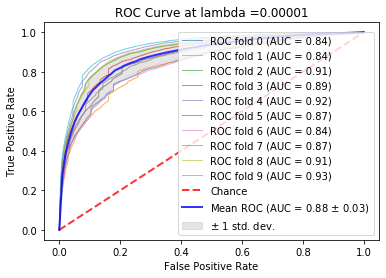

Now testing lambda =  0.0001
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


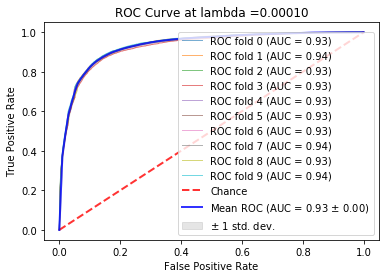

Now testing lambda =  0.001
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


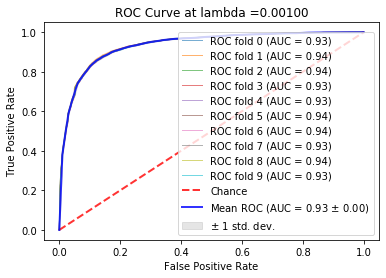

Now testing lambda =  0.01
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


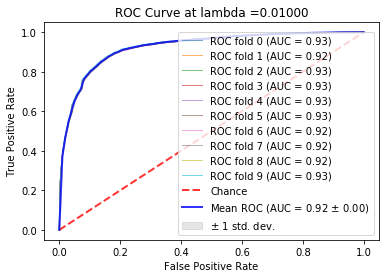

Now testing lambda =  0.1
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


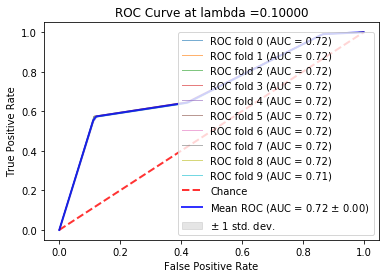

Now testing lambda =  1.0
Now at fold  0
Now at fold  1
Now at fold  2
Now at fold  3
Now at fold  4
Now at fold  5
Now at fold  6
Now at fold  7
Now at fold  8
Now at fold  9


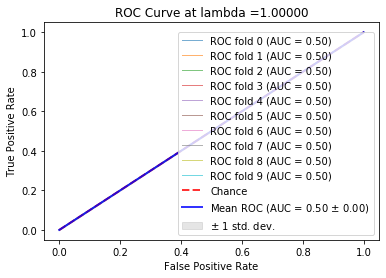

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# models.crossvalidation.kfold
# LogisticRegressionCV

# c = regularization strength, c = 1/lambda
g_allAUC=[]

skf = KFold(n_splits=10, shuffle=True) # throws error when only all 0 or all 1 in training y set, so use stratified instead

# spliting up data biases model i.e. not random profiles, cross-validation compares outcomes over diff data to account for bias over the multiple sets 
for lamb in np.logspace(-5, 0, 6):
    print("Now testing lambda = ", lamb)
    g_logreg = SGDClassifier(alpha=lamb,penalty='l1', tol=0.01, max_iter=200, loss='log')

    g_tprs = []
    g_aucs = []
    g_accs = []
    g_mean_fpr = np.linspace(0, 1, 100)
  
    i=0

    for train, test in skf.split(x_trainDM,y_train):
        print("Now at fold ", i)
        g_mod = g_logreg.fit(x_trainDM[train], y_train[train])
        g_probas_ = g_mod.predict_proba(x_trainDM[test])
        # Compute ROC curve and area the curve
        g_fpr, g_tpr, g_thresholds = skm.roc_curve(y_train[test], g_probas_[:, 1])
        g_tprs.append(np.interp(g_mean_fpr, g_fpr, g_tpr))
        g_tprs[-1][0] = 0.0
        g_roc_auc = skm.roc_auc_score(y_train[test],g_probas_[:,1])
        g_aucs.append(g_roc_auc)
        plt.plot(g_fpr, g_tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, g_roc_auc))
        g_accs.append(skm.accuracy_score(y_train[test], g_mod.predict(x_trainDM[test])))
        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

    g_mean_tpr = np.mean(g_tprs, axis=0)
    g_mean_tpr[-1] = 1.0
    g_mean_auc = skm.auc(g_mean_fpr, g_mean_tpr)
    g_std_auc = np.std(g_aucs)
    plt.plot(g_mean_fpr, g_mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (g_mean_auc, g_std_auc),
          lw=2, alpha=.8)

    g_std_tpr = np.std(g_tprs, axis=0)
    g_tprs_upper = np.minimum(g_mean_tpr + g_std_tpr, 1)
    g_tprs_lower = np.maximum(g_mean_tpr - g_std_tpr, 0)
    plt.fill_between(g_mean_fpr, g_tprs_lower, g_tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve at lambda =%0.5f' % lamb)
    plt.legend(loc="lower right")
    plt.show()
    
    g_allAUC.append([lamb, g_mean_auc,np.mean(g_accs)])

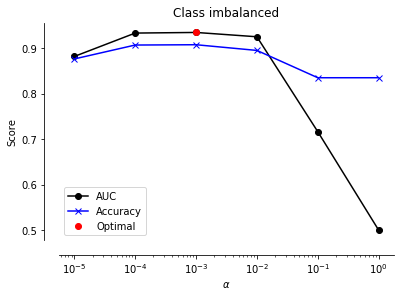

In [247]:
# plot lambda, scores, and selected optimal value
g_AUC=np.array(g_allAUC)

g_AUC=g_AUC[g_AUC[:,0].argsort()]

plt.plot(g_AUC[:,0], g_AUC[:,1], '-ko')
plt.plot(g_AUC[:,0], g_AUC[:,2], '-bx')
plt.plot(g_AUC[2,0],g_AUC[2,1],color='r',marker="o",linestyle='none')
plt.xlabel(r'$\alpha$')
#plt.axhline(lassocv_score, color='b', ls='--')
#plt.axvline(lassocv_alpha, color='b', ls='--')
plt.ylabel('Score')
plt.xscale('log')
plt.legend(('AUC','Accuracy','Optimal'))
plt.title("Class imbalanced")
sns.despine(offset=15)

In [290]:
# lambda alpha (1.00000000e+04) is optimal lambda
g_optiLamb=g_AUC[2,0]
print("Optimal lambda is: ", g_optiLamb*0.9*glmTrain2.shape[0])

g_logreg = SGDClassifier(alpha=optiLamb,penalty='l1', tol=0.01, max_iter=200, loss='log',class_weight='balanced')
g_mod = g_logreg.fit(x_trainDM, y_train)

Optimal lambda is:  1418.4639000000002


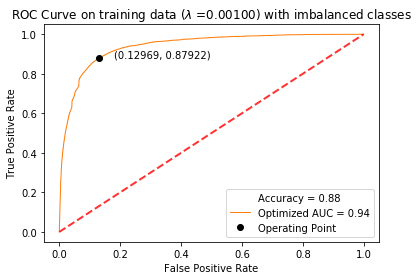

Accuracy:  0.8754630977919142
AUC:  0.9396393960175143


,keys,coef
5,x.temp,0.017828
19,x.hct,0.020312
27,x.kidney.sofa,0.082922
17,x.paco2,-0.128735
7,x.pao2,0.157057
25,x.liver.sofa,0.164426
8,x.fio2,0.197216
22,x.resp.sofa,0.298118
4,x.resp,0.367633
0,x.hr,0.370715


In [291]:
g_probas_ = g_mod.predict_proba(x_trainDM)

# Compute ROC curve and area the curve
g_fpr, g_tpr, g_thresholds = skm.roc_curve(y_train, g_probas_[:, 1])
g_roc_auc = skm.roc_auc_score(y_train,g_probas_[:,1])

# find shortest distance to tpr=1,fpr=0 to determine optimal threshold
g_roc_values=np.transpose(np.vstack((g_fpr,g_tpr)))
g_dist=np.empty((g_roc_values.shape[0],1))
for i in range(0,g_roc_values.shape[0]):
    g_dist[i]=np.linalg.norm((0,1)-g_roc_values[i])
g_x_coord = g_roc_values[np.argmin(g_dist)][0]
g_y_coord = g_roc_values[np.argmin(g_dist)][1]

# plot ROC curve
plt.plot([], [], ' ', label="Accuracy = %0.2f" % skm.accuracy_score(y_train, g_mod.predict(x_trainDM)))
plt.plot(g_fpr, g_tpr, lw=1, label='Optimized AUC = %0.2f' % (g_roc_auc))
plt.plot(g_x_coord,g_y_coord,color='k',marker='o',linestyle="None",label='Operating Point')
plt.text(g_x_coord+0.05, g_y_coord, '({}, {})'.format(round(g_x_coord,5), round(g_y_coord,5)))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on training data ($\lambda$ =%0.5f) with imbalanced classes' % g_optiLamb)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()

print("Accuracy: ", skm.accuracy_score(y_train, g_mod.predict(x_trainDM)))
print("AUC: ", g_roc_auc)
g_helps2=pd.DataFrame()
g_helps2['keys']=x_train.keys()
g_helps2['coef']=g_mod.coef_[0]
g_helps3=g_helps2.drop(g_helps2[g_helps2["coef"]==0].index,axis=0)
g_helps3.sort_values("coef")

g_helps3.iloc[g_helps3['coef'].abs().argsort()]

In [236]:
g_testProbas_ = g_mod.predict_proba(x_testDM)

# Compute ROC curve and area the curve
g_test_roc_auc = skm.roc_auc_score(y_test,g_testProbas_[:,1])

print("For testing set")
print("Accuracy: ", skm.accuracy_score(y_test, g_mod.predict(x_testDM)))
print("AUC: ", g_test_roc_auc)
print("PPV: ", np.sum(y_test)/np.sum(g_mod.predict(x_testDM)))
print("Sensitivity: ",g_y_coord)
print("Specificity: ",1-g_x_coord)

For testing set
Accuracy:  0.6806256518298404
AUC:  0.6686060627239818
PPV:  0.9547720856515495
Sensitivity:  0.8782468155678232
Specificity:  0.8712884382232999


7.25

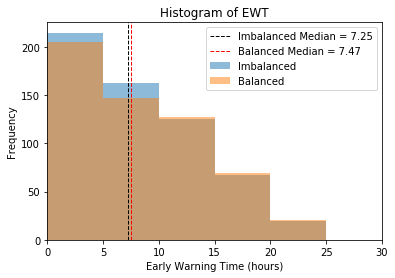

In [289]:
g_testOnset = testOnsetini

g_optimalIndex = np.where((g_fpr == g_x_coord) & (g_tpr == g_y_coord))
g_optimalThreshold = g_thresholds[g_optimalIndex][0]

# first, apply model to testing data
g_y_testPred=g_mod.predict(x_testDM)
g_y_testPred[g_y_testPred>g_optimalThreshold]=1

# filter data to find patients with both predicted AND actual y = 1
g_glmTest_filt=glmTest2[['patient','y']]
g_glmTest_filt['y_pred'] = np.array(g_y_testPred)
g_glmTest_filt['TS']=testTSini['x']
#g_glmTest_SepticShock=g_glmTest_filt[(g_glmTest_filt['y_pred']==1)&(g_glmTest_filt['y']==1)]
g_glmTest_SepticShock=g_glmTest_filt[(g_glmTest_filt['y_pred']==1)&(g_glmTest_filt['y']==1)].groupby('patient').first()
g_glmTest_SepticShock['patient'] =g_glmTest_SepticShock.index

# convert strings to datetime
from datetime import datetime
from dateutil.parser import parse

# concat measurement timestamp to glmTest_SepticShock
g_glmTest_SepticShock['TS']=[i.replace(year=2020,month=10,day=17) for i in [parse(x) for x in g_glmTest_SepticShock['TS'].values]]
#,month=10,day=17

# concat actual onset timestamp to glmTest_SepticShock
g_glmAllSeptic=glmTest2[glmTest2['y']==1].groupby('patient').first()
g_glmAllSeptic['patient'] = g_glmAllSeptic.index
g_glmAllSeptic = g_glmAllSeptic.reset_index(drop=True)
g_testOnset = g_testOnset.reset_index(drop=True)
g_testOnset = g_testOnset.join(g_glmAllSeptic['patient'])
g_glmTest_SepticShock['Onset']=[g_testOnset.iloc[list(np.where(g_testOnset['patient'] == x)[0])[0],1] for x in g_glmTest_SepticShock['patient'].values]
g_glmTest_SepticShock['Onset']=[i.replace(year=2020,month=10,day=17) for i in [parse(x) for x in g_glmTest_SepticShock['Onset'].values]]

# find difference between measurement TS and onset TS
g_glmTest_SepticShock.reset_index(drop=True)
g_glmTest_SepticShock['EWT']=[(g_glmTest_SepticShock.iloc[x,4]-g_glmTest_SepticShock.iloc[x,2]).total_seconds()/(60*60) for x in range(0,len(g_glmTest_SepticShock))]
#glmTest_SepticShock['EWT']=np.where(glmTest_SepticShock['EWT']<0, 0, glmTest_SepticShock['EWT'])
g_glmTest_SepticShock = g_glmTest_SepticShock.drop(g_glmTest_SepticShock[g_glmTest_SepticShock['EWT'] < 0].index)
plt.hist(g_glmTest_SepticShock['EWT'].values,bins=range(0,50,5),label='Imbalanced',alpha=0.5)
plt.axvline(np.median(g_glmTest_SepticShock['EWT'].values), color='k', linestyle='dashed', linewidth=1,label="Imbalanced Median = %0.2f" % np.median(g_glmTest_SepticShock['EWT'].values))
plt.hist(glmTest_SepticShock['EWT'].values,bins=range(0,50,5),label='Balanced',alpha=0.5)
plt.axvline(np.median(glmTest_SepticShock['EWT'].values), color='r', linestyle='dashed', linewidth=1, label="Balanced Median = %0.2f" % np.median(glmTest_SepticShock['EWT'].values))
plt.xlim([0,30])
plt.title("Histogram of EWT")
plt.xlabel("Early Warning Time (hours)")
plt.ylabel("Frequency")
plt.legend()
np.median(g_glmTest_SepticShock['EWT'].values)

Imbalanced Median EWT Time: 7.25h < Balanced Median EWT Time: 7.47h

Thus, the imbalanced model performs **worse** than the balanced model.